In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import userdata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


vision全部載せ①

iVBORw0KGgoAAAANSUhEUgAAAwAAAAMDCAIAAACad+V3AAAABmJLR0QA/wD/AP+gvaeTAAAgAElEQVR4nOR9Z1xTy/Z29KAe9dil924IvfcOIqCCiiKoKCoWBAQRrCAWxN6wINJC700QBCkioPSq0hXpvUNCsvf7YV9zc0gIO4Vz733/z48Pmj17Mklmz6xZ61nPWsKEQCDFxDAYzB9//LFVTa0n672wmfkaLi7EImNqaiozI6O+rk5EVFRBUZGfn5+BnSfEx5eVliIQiNWrV5uZm6PExWnrJzMjY3R0dO++fXSOB4/HV1ZU1FRXd3V18fDycnBwsHNwrFu3bu3atcuWLVu6dOlSBOJrYsIsDr9JRWVkdHRoaKizs7Pj169ly5dzc3GxsrGtXbtWTl6ezmGQxdTUVNrbt40NDdIyMgaGhsuXL1+MdyHG7OxsGBqNWLLExNSUhYWF2ttHWlpa0t5u2We5mpV1wcYADtdXVdldWrqahYVTTX01GxtNQyaDttbW3NzcwYEBXT09GVnZpUuXMqpnUoy1/2x9ly5pe2zpsmXQK/19fYEBATvNzLYgkYv3vvBRWlLS0dFhvmsX/Fvacz7gZ2f5txrNeb26ujorM/OYnd369etpHs/Q4KDfq1d2J05s2ryZ5k4gFBUWZmdlsbKyIsXENmzcuHLlSl5e3mW/f4jRtraOwk+oAwfn3NXf39/T09PT3V3y5YuAoKCCoqKQkBCdI+np7g4KDDx67BgLjJk/B11dXfGxsQ5OTuSvFheP/WoXNDGtfu0nf9YZsWQJAoEAQTDgzRt+fn49fX1q366vry/A39/Byemvv/6i3BKHwwUHBbW2tKxevdr94kUmJqY5DQAASIiP7+rsPHjo0IaNGyl0NTgwkJ+f3/D9+9p168zNzVdjMe25ueJHjjSnpIy2tkqdOLls1aoFR95fWzvc2CCyew+FNj8/ZP+xfAWXhsaCvbW2tOR8+DA4MCAuKSktLc05/8aK

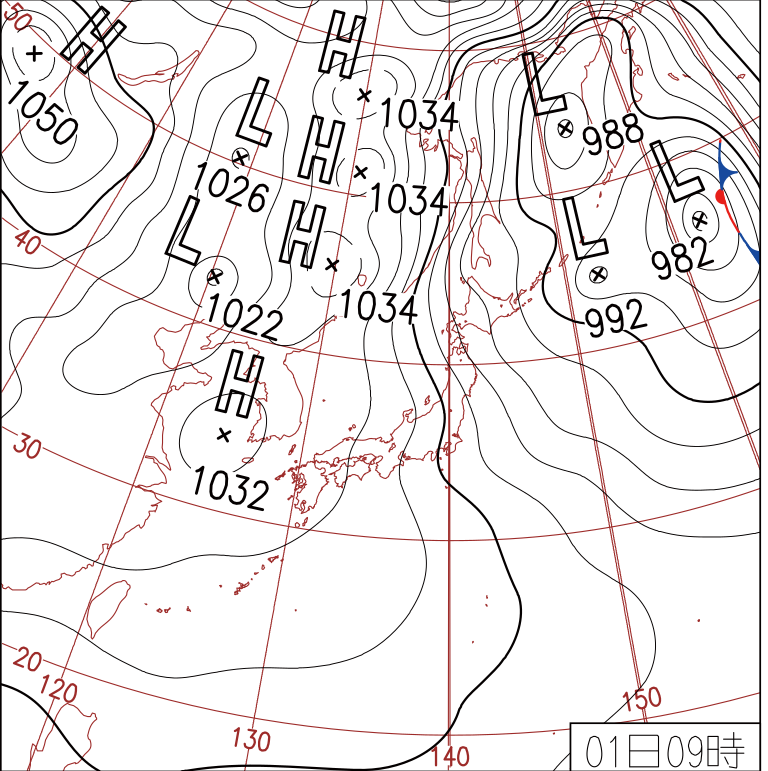


入力された画像は2022年1月1日9時の天気図です。

#命令文
以下の条件で、入力した天気図の天気概況のコメントを生成してください。
・体言止めが多く使われており、専門家のような口調である。
・この文章は予報ではなく現状の天気図の時点での気象を示すコメントなので、「〜か」「〜だろう」「〜の模様」などの曖昧な表現はしないで、情報を断定し言い切りの口調にしてください。
・必ずトークン数ではなく日本語の文字数で、80文字以上の文字数のコメントを生成してください。句読点やひらがな、漢字1文字は1文字と数えてください。
・日本語の文章であること。
・年月日はコメント内に含まなくて良いです。
・気象情報以外の余計な文章をいれないでください。

<Response [200]>
{
    "id": "chatcmpl-9mZpTiwESPEv9byf4SYmOmfNcoOu5",
    "object": "chat.completion",
    "created": 1721364499,
    "model": "gpt-4o-mini-2024-07-18",
    "choices": [
        {
            "index": 0,
            "message": {
                "role": "assistant",
                "content": "高気圧が日本付近を中心に広がり、晴天をもたらしている。南西からの温暖な空気が流入し、気温が上昇している。北部では低気圧が接近し、曇りや雨の予兆が見られる。すでに西日本では不安定な気象条件が発生しており、風向きは南寄りのため、波浪にも注意が必要である。"
            },
            "logprobs": null,
            "finish_reason": "stop"
        }
    ],
    "usage": {
        "prompt_tokens": 25737,
        "completion_tokens": 111,
        "total_tokens": 25848
    },
    "system_fingerprint"

In [6]:
import requests
from datetime import datetime
import base64
import json
import re
from IPython.display import Image, display
import base64
from io import BytesIO

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
    print(encoded_image)
    # Base64エンコードされたデータをデコードし、バイト列に変換
    image_data = base64.b64decode(encoded_image)
    # バイト列から画像を生成
    image = Image(data=image_data)
    # 画像を表示
    display(image)
    return encoded_image

image_path = "/content/drive/My Drive/研究用/2023_12_調査ノート/天気図/png/20220101.png"
base64_image = encode_image(image_path)

match = re.search(r'(\d{4})(\d{2})(\d{2})\.png$', image_path)
if match:
    year, month, day = match.groups()
    year, month, day = int(year), int(month), int(day)
    date = f"{int(year)}年{int(month)}月{int(day)}日"
    formatted_date_int = f"{year}-{month}-{day}"
else:
    print("画像ファイル名から日付を解析できませんでした。")

weather_date = date
formatted_date = f"{year}-{month}-{day}"

# ファイルを読み込むための関数
def read_file(file_path):
    try:
        with open(file_path, "r") as file:
            return file.read()
    except IOError:
        return "ファイルが読み込めませんでした。"

weather_date = date

# instruction 変数にインストラクションのファイル内容を格納
instruction_file_path = "/content/drive/My Drive/研究用/2023_12_調査ノート/プロンプト文/gpt/v1_instruction.txt"
instruction = read_file(instruction_file_path)

text = f"""
入力された画像は{weather_date}9時の天気図です。

{instruction}
"""

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": f"{text}"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/png;base64,{base64_image}",
            "detail": "high"
          }
        }
      ]
    }
  ],
  "max_tokens": 4000
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(text)

if response.status_code == 200:
    print(response)
    formatted_response = json.dumps(response.json(), indent=4, ensure_ascii=False)
    print(formatted_response)
    result = response.json()["choices"][0]["message"]["content"]
    print(result)
else:
    print(f"APIリクエストに失敗しました: ステータスコード {response.status_code}")